In [1]:
import sys, os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import caffe

In [2]:
caffe.set_device(0)
caffe.set_mode_gpu()

In [3]:
net = caffe.Net("/home/jkarp314/sw/caffe_notebooks/alex_ana.prototxt", 
       "/data/drinkingkazu/v03/singlep_alex/hires_filter/snapshot_rmsprop_iter_26000.caffemodel",
        caffe.TEST)

In [4]:
eminus_scores = []
for i in xrange(190):
    if i % 500 == 0:
        print i
    net.forward()
    for j in xrange(100):
        if net.blobs['label'].data[j] == 0.:
            eminus_scores.append(net.blobs['fc8'].data[j].copy())

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500


In [5]:
eminus_classes = []
for score in eminus_scores:
    eminus_classes.append(score.argmax())
check = []
for cl in eminus_classes:
    if cl == 0:
        check.append(1.)
    else:
        check.append(0.)
accuracy = sum(check)/len(check)
print accuracy

0.704463994787


In [14]:
totals = [0,0,0,0,0]
for cl in eminus_classes:
    totals[cl] += 1
n = float(len(eminus_classes))
fracs = [totals[i]/n for i in range(5)]
print fracs

[0.7044639947865754, 0.2753339850114044, 0.004887585532746823, 0.01401107852720756, 0.0013033561420658195]


In [4]:
sorted_scores = [[], [], [], [], []]
for i in xrange(190):
    if i%500 == 0:
        print i
    net.forward()
    for j in xrange(100):
        sorted_scores[int(net.blobs['label'].data[j])].append(net.blobs['fc8'].data[j].copy())

0


In [11]:
kk = np.array([np.array(i) for i in sorted_scores])

In [14]:
for i in xrange(5):
    np.savetxt("%d.txt"%i,kk[i])

In [7]:
sorted_classes = [[], [], [], [], []]
for i in xrange(5):
    for score in sorted_scores[i]:
        sorted_classes[i].append(score.argmax())
totals = np.zeros((5,5))
for i in xrange(5):
    for cl in sorted_classes[i]:
        totals[i][cl] += 1
fracs = np.empty((5,5))
for i in xrange(5):
    n = float(len(sorted_classes[i]))
    fracs[i] = totals[i]/n



NameError: name 'sorted_scoresscores' is not defined

In [7]:
print net.blobs['data'].data.shape

(1, 1, 576, 576)


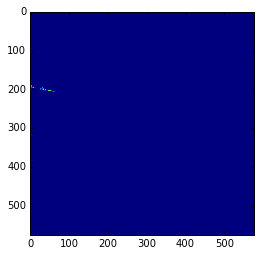

In [8]:
plt.imshow(net.blobs['data'].data[0][0])

In [1]:
range(10)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [2]:
xrange(10)

xrange(10)